# Libary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


# Load Data

In [3]:
penguin = sns.load_dataset('penguins')
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguin.shape

(344, 7)

# Handle Missing Data

In [5]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
features=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]

In [8]:
# Filling missing sex value with the most appearing value
penguin['sex'].fillna(penguin['sex'].mode()[0],inplace=True)
# Filling others missing features with mean value
penguin[features]= penguin[features].apply(lambda col: col.fillna(col.mean()),axis=0)

In [9]:
penguin.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Visualize Data

(0.0, 180.0)

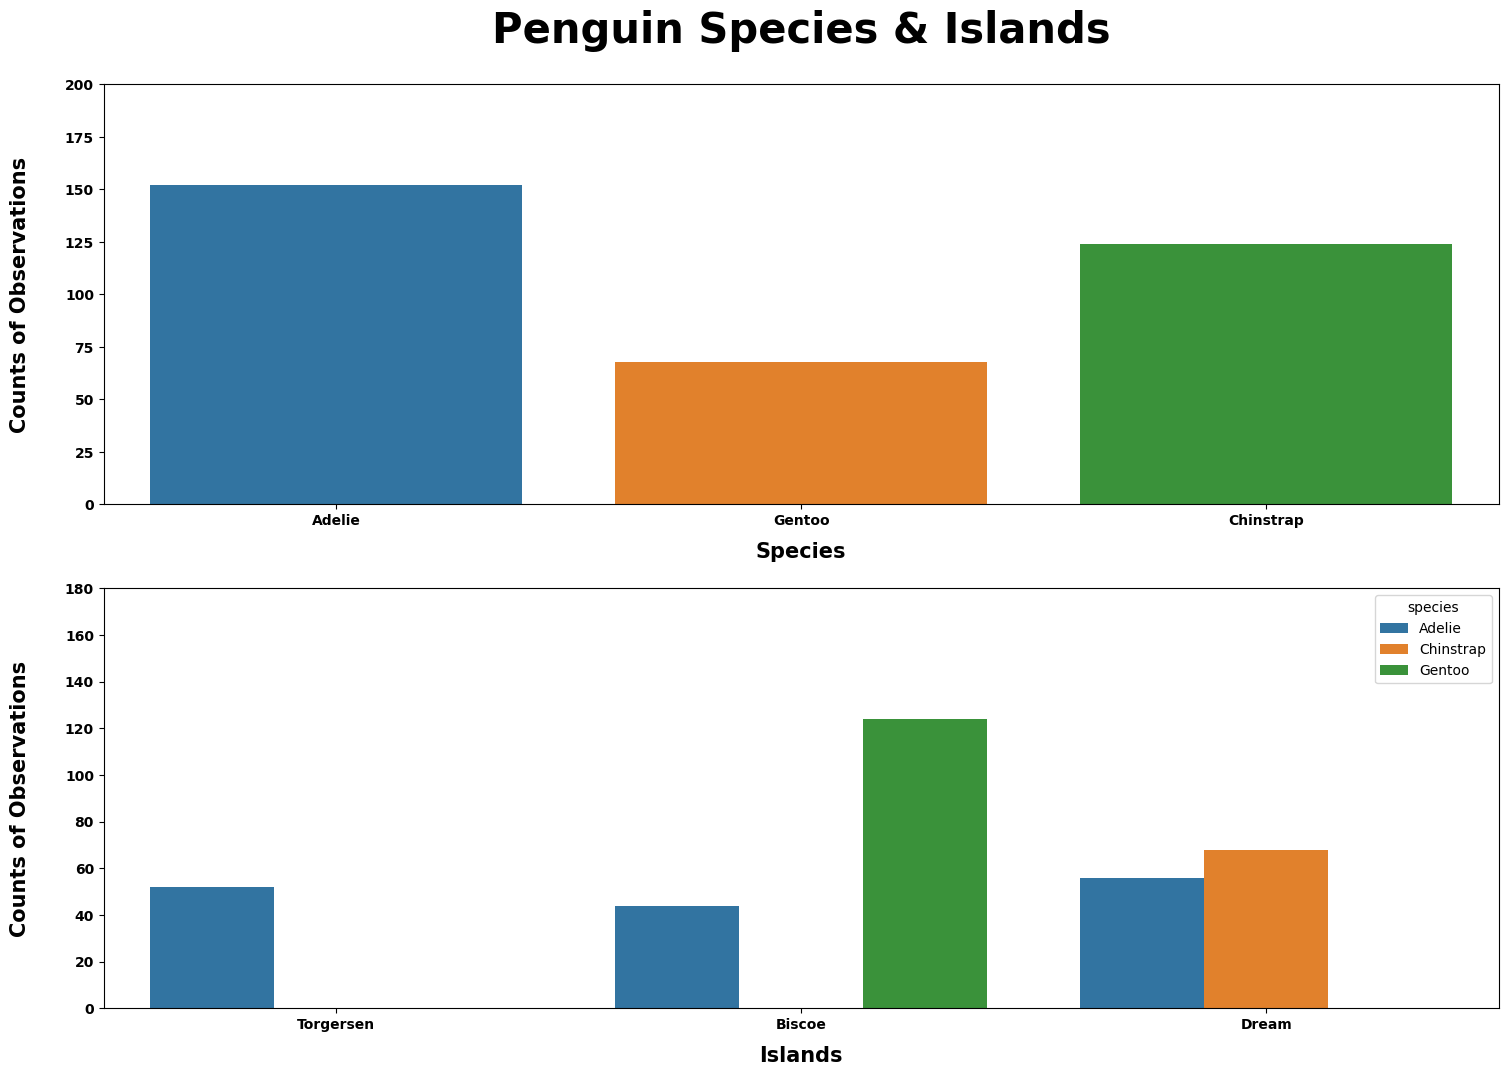

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1,
                               figsize=(18, 12))


sns.countplot(data=penguin, x="species", hue="species", ax=ax1)
sns.countplot(data=penguin, x="island", hue="species", ax=ax2)


ax1.set_title("Penguin Species & Islands", weight="bold",fontsize=30, pad=30)

ax1.set_xlabel("Species", weight="bold", fontsize=15, labelpad=10)
ax1.set_ylabel("Counts of Observations", weight="bold", fontsize=15, labelpad=25)
ax2.set_xlabel("Islands", weight="bold", fontsize=15, labelpad=10)
ax2.set_ylabel("Counts of Observations", weight="bold", fontsize=15, labelpad=25)


ax1.set_xticklabels(labels=["Adelie", "Gentoo", "Chinstrap"],
                    weight="semibold",
                    fontsize=10)
ax1.set_yticklabels(labels=list(np.arange(0, 225, 25)),
                    weight="semibold",
                    fontsize=10);
ax2.set_xticklabels(labels=["Torgersen", "Biscoe", "Dream"],
                    weight="semibold",
                    fontsize=10)
ax2.set_yticklabels(labels=list(np.arange(0, 200, 20)),
                    weight="semibold",
                    fontsize=10)

ax1.set_ylim(0, 200)
ax2.set_ylim(0, 180)

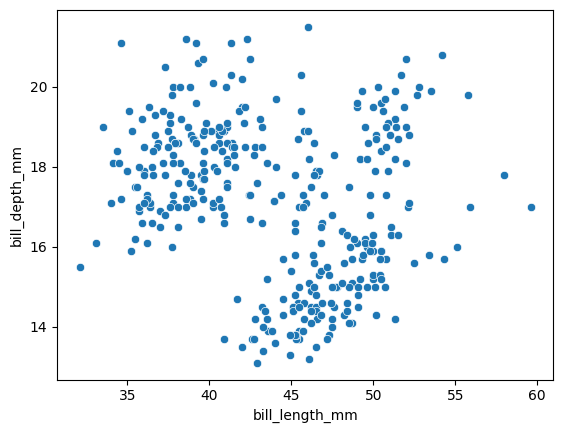

In [12]:

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',data= penguin)
plt.show()

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

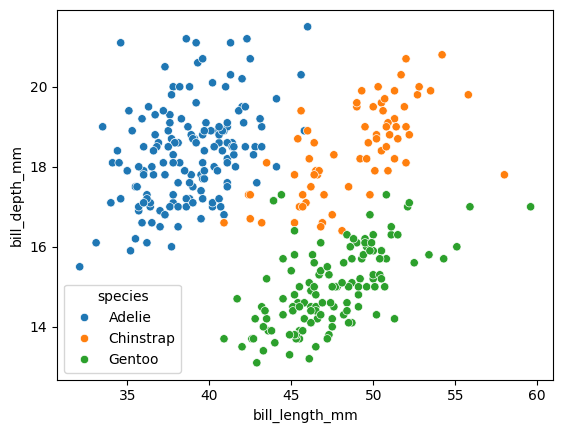

In [13]:

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm',data= penguin, hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

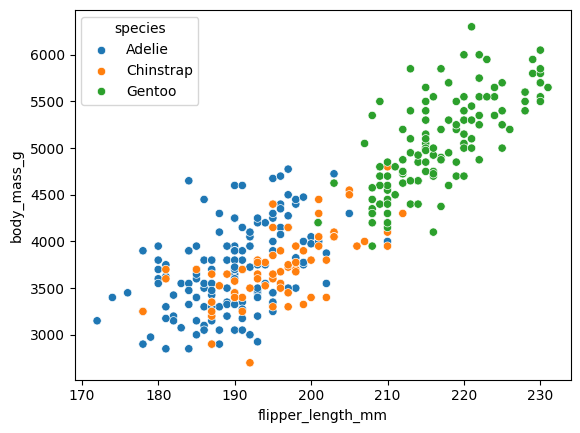

In [14]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g',data= penguin, hue='species')

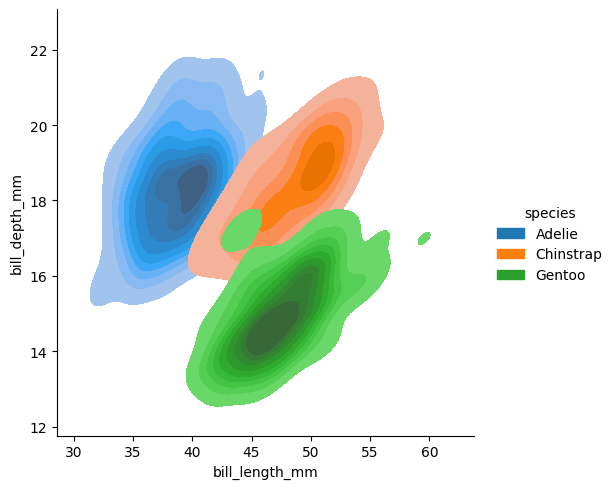

In [55]:
sns.displot(data=penguin, x='bill_length_mm',y='bill_depth_mm' ,hue='species', kind='kde', fill=True)

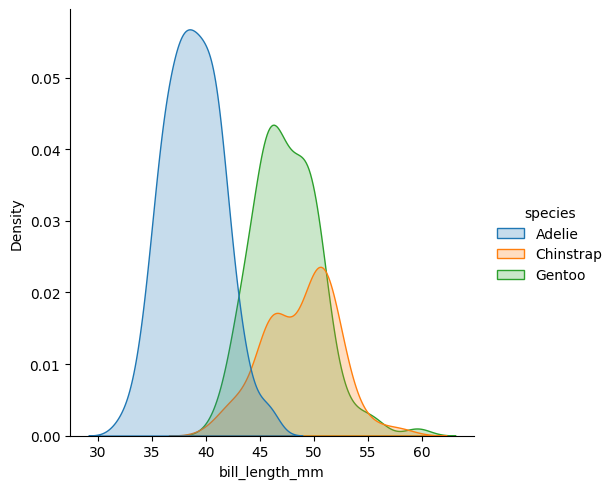

In [16]:
sns.displot(data=penguin, x='bill_length_mm', hue='species', kind='kde', fill=True)

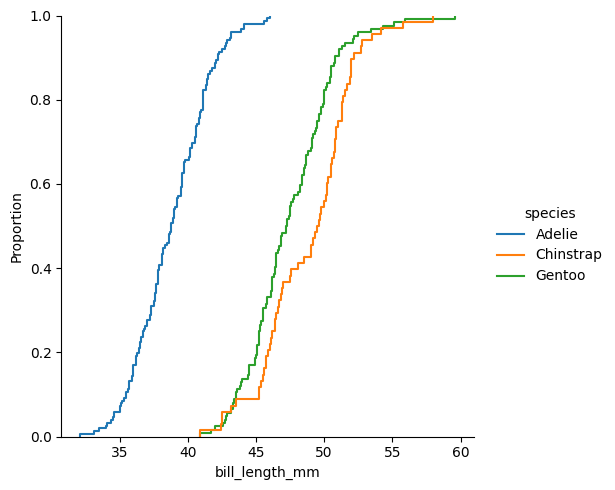

In [17]:
sns.displot(data=penguin, x='bill_length_mm', hue='species', kind='ecdf')

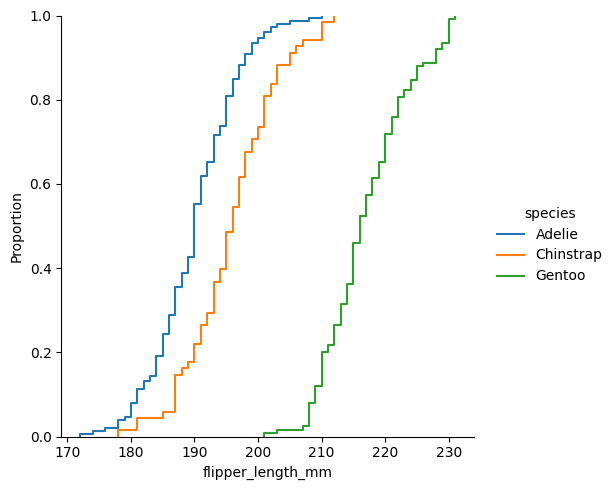

In [18]:
sns.displot(data=penguin, x='flipper_length_mm', hue='species', kind='ecdf')

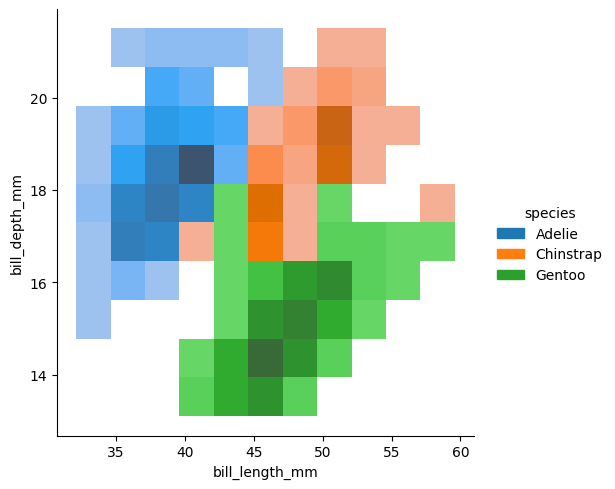

In [19]:
sns.displot(x='bill_length_mm', y='bill_depth_mm', hue ='species',data= penguin)

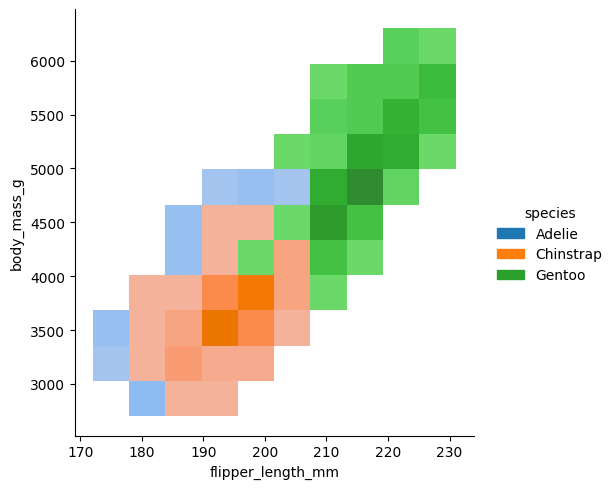

In [20]:
sns.displot(x='flipper_length_mm',y='body_mass_g',data= penguin,hue='species')

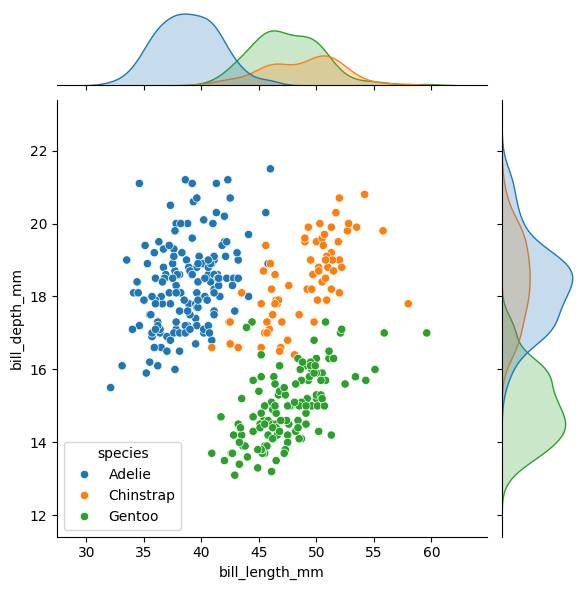

In [21]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm',hue='species',data=penguin)

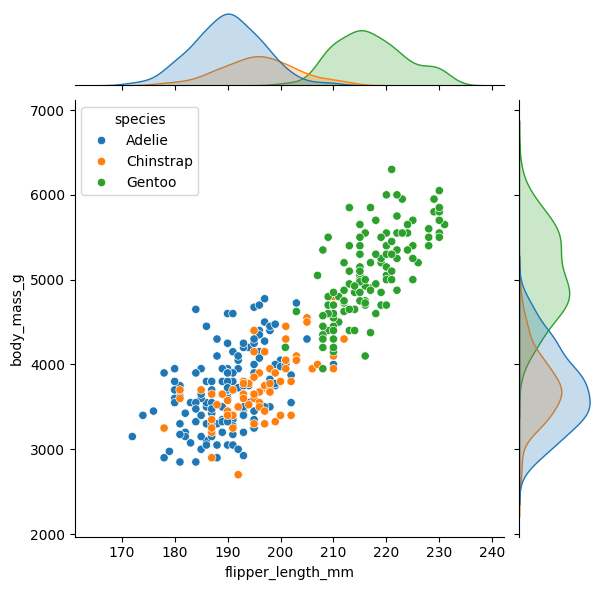

In [22]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g',hue='species',data=penguin)

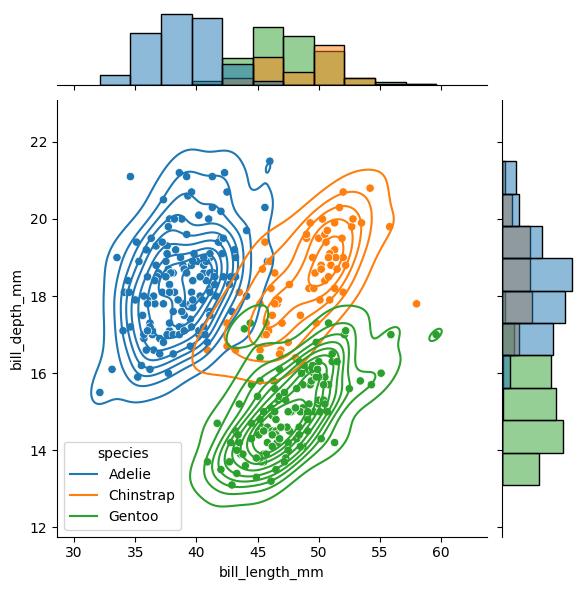

In [23]:
g= sns.jointplot(data=penguin,x='bill_length_mm',y='bill_depth_mm',hue='species')
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

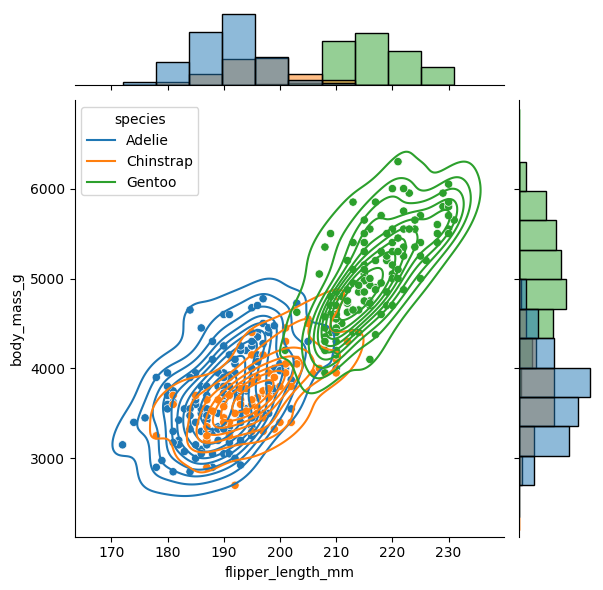

In [24]:
g= sns.jointplot(data=penguin,x='flipper_length_mm',y='body_mass_g',hue='species')
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

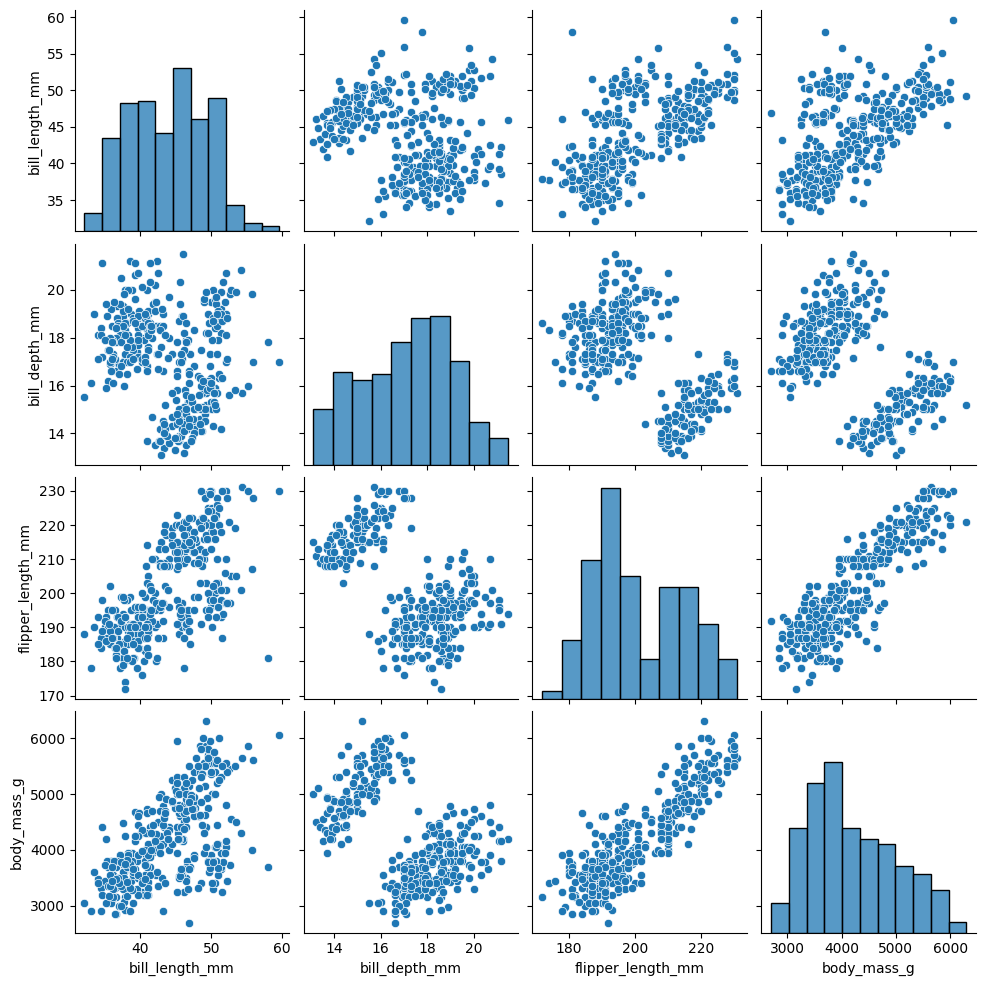

In [25]:
sns.pairplot(data=penguin)


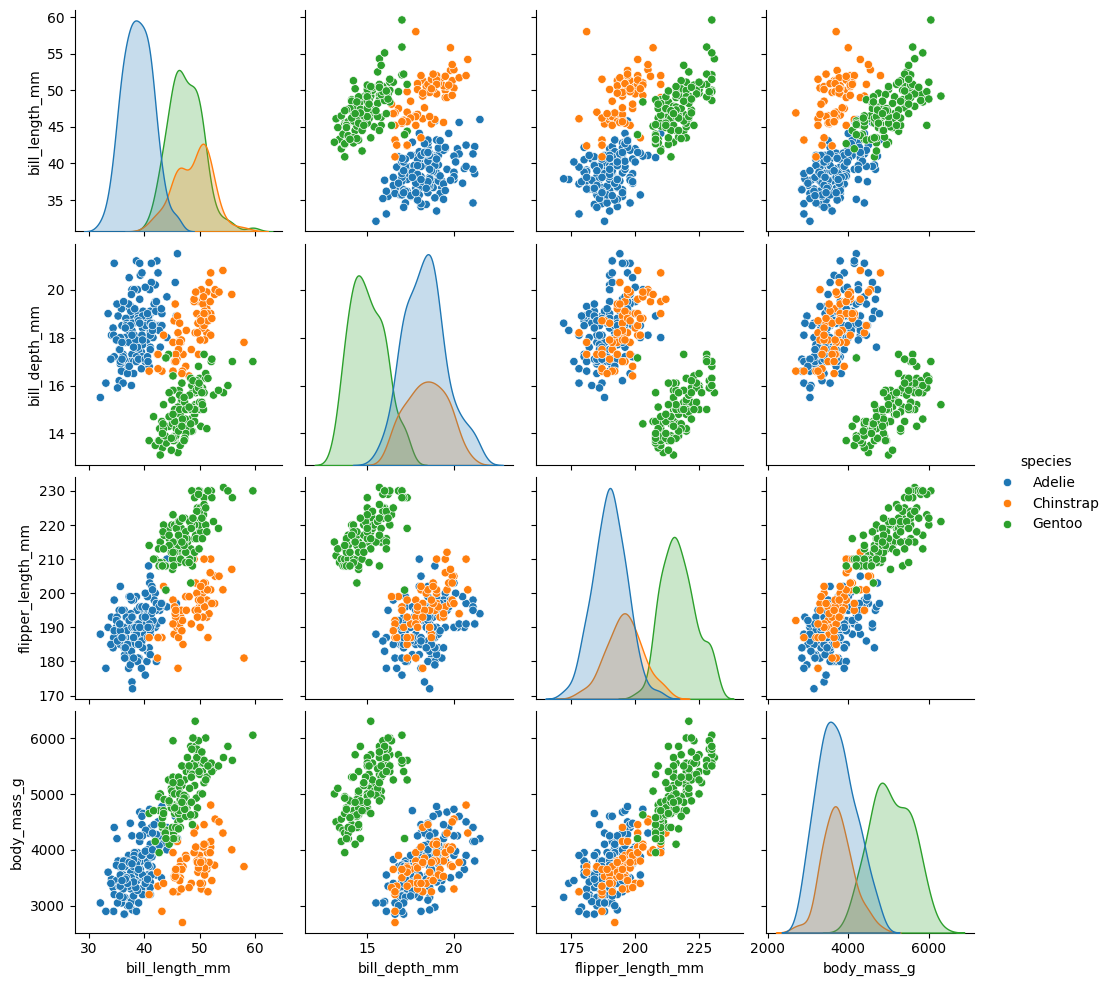

In [26]:
sns.pairplot(data=penguin,hue='species')

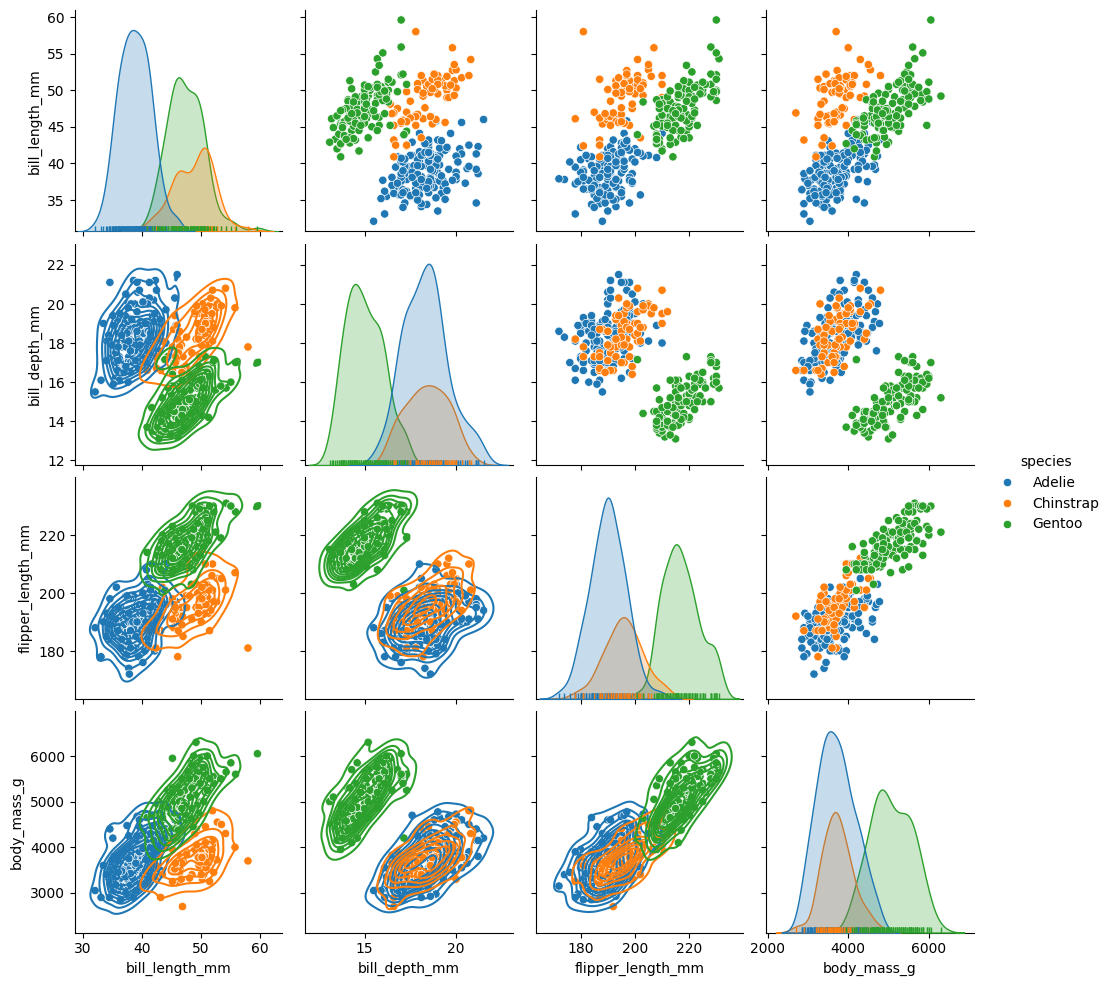

In [27]:
sns.pairplot(data=penguin,hue='species').map_diag(sns.rugplot).map_lower(sns.kdeplot)

<Axes: xlabel='species', ylabel='bill_length_mm'>

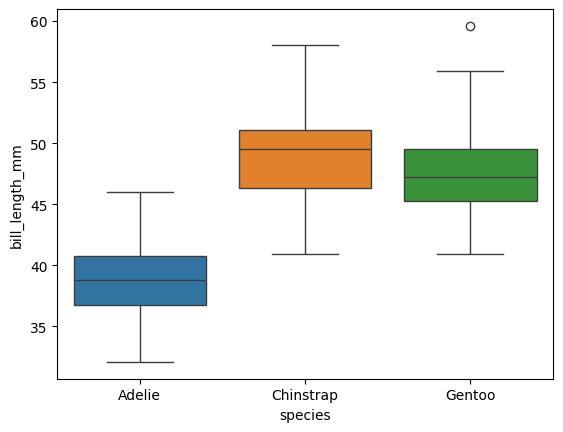

In [28]:
sns.boxplot(data=penguin, x='species', y='bill_length_mm',hue='species')

<Axes: xlabel='species', ylabel='bill_length_mm'>

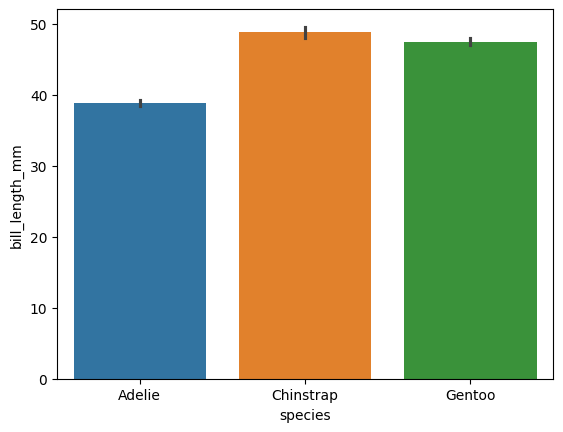

In [29]:
sns.barplot(data=penguin, x='species', y='bill_length_mm',hue='species')

<Axes: xlabel='species', ylabel='bill_length_mm'>

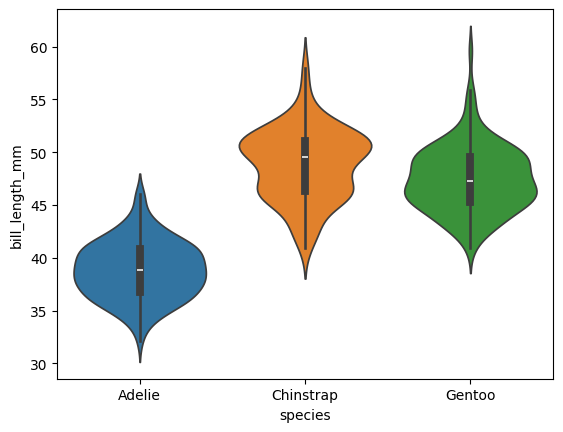

In [30]:
sns.violinplot(data=penguin, x='species', y='bill_length_mm',hue='species')

<Axes: xlabel='species', ylabel='bill_length_mm'>

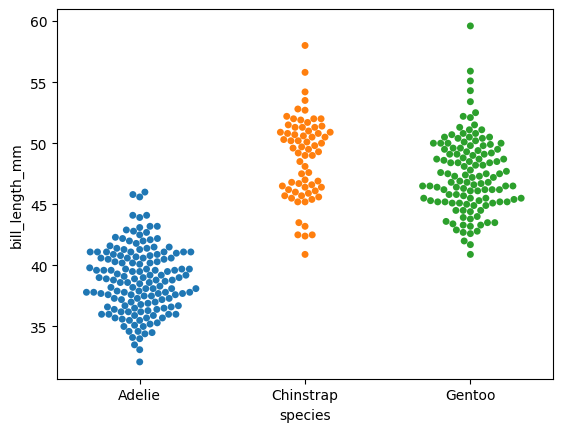

In [31]:
sns.swarmplot(data=penguin, x='species', y='bill_length_mm',hue='species')

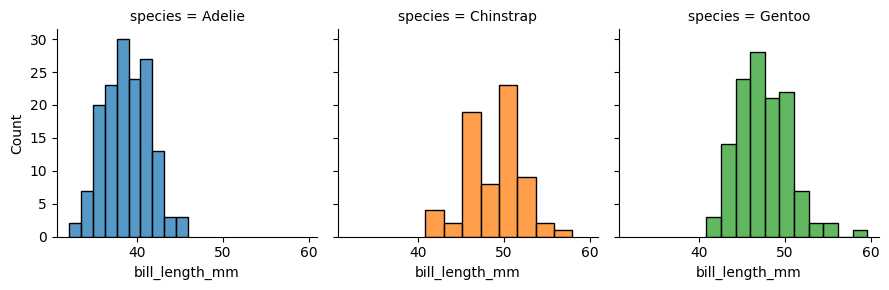

In [32]:
g = sns.FacetGrid(penguin, col='species',hue='species')
g.map(sns.histplot, 'bill_length_mm')

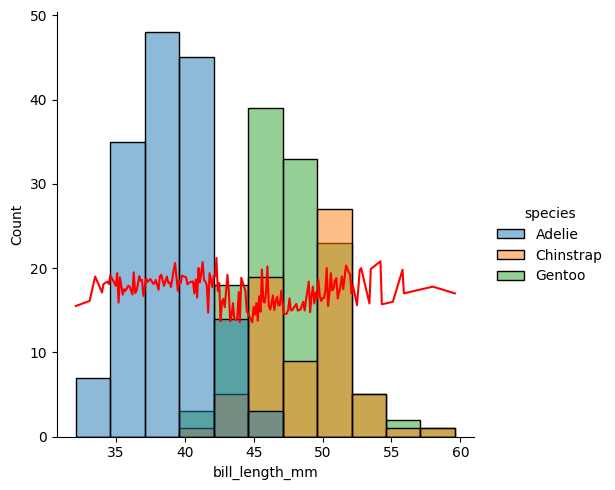

In [33]:
sns.displot(data=penguin,x='bill_length_mm',hue='species')
line = penguin.groupby('bill_length_mm')['bill_depth_mm'].mean()
plt.plot(line,color='red',label='bill_length_mm')
plt.show()

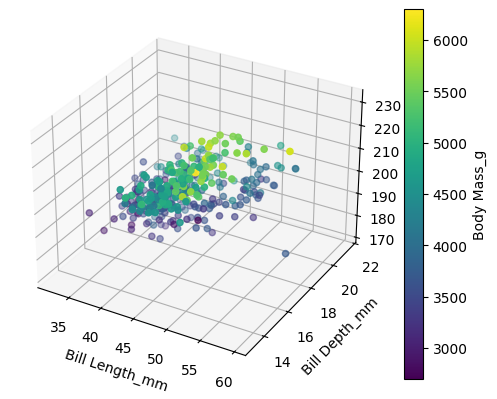

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
sc = ax.scatter(penguin['bill_length_mm'], penguin['bill_depth_mm'], penguin['flipper_length_mm'], c=penguin['body_mass_g'], cmap='viridis', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label('Body Mass_g')
ax.set_xlabel('Bill Length_mm')
ax.set_ylabel('Bill Depth_mm')
ax.set_zlabel('Flipper Length_mm')
plt.show()

Text(0.5, 1.0, 'Penguins Correlation')

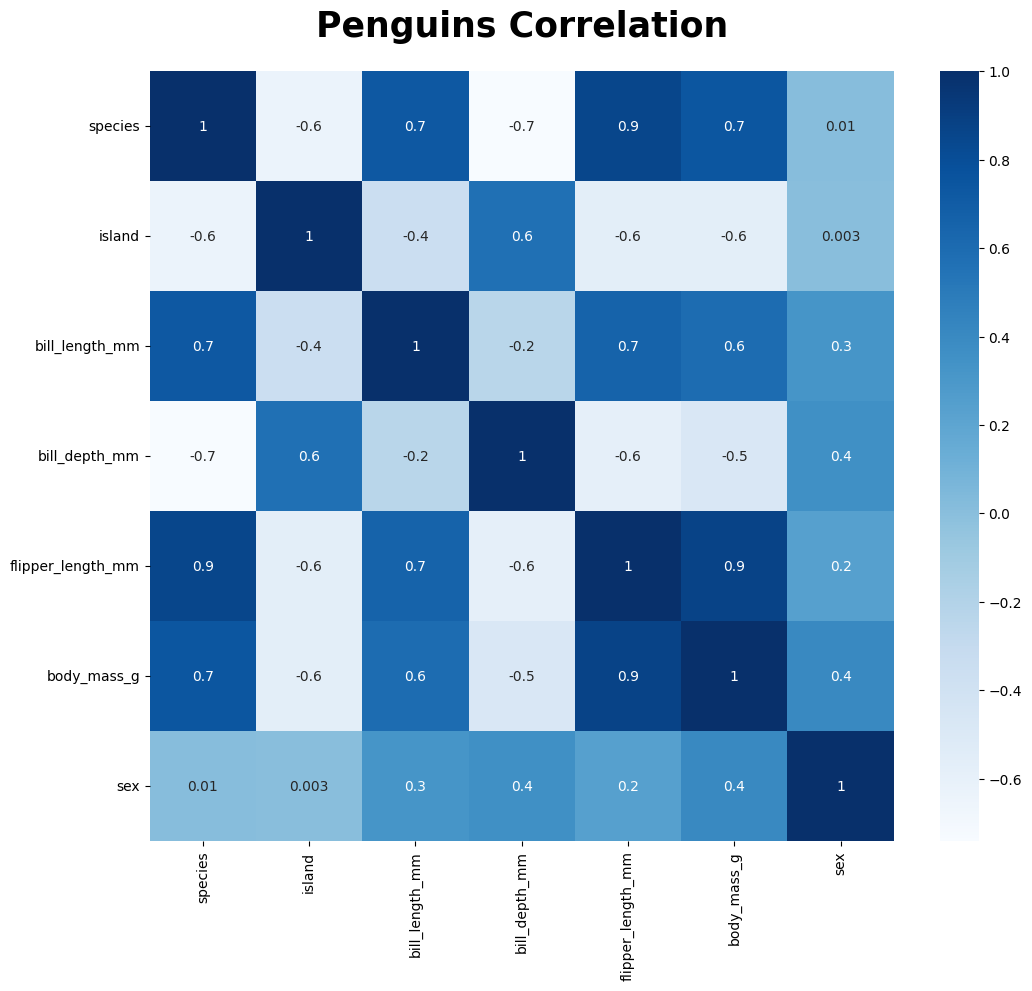

In [57]:
encoder=LabelEncoder()
penguin_encoded=penguin
penguin_encoded['sex']= encoder.fit_transform(penguin_encoded['sex'])
penguin_encoded['island']=encoder.fit_transform(penguin_encoded['island'])
penguin_encoded['species']=encoder.fit_transform(penguin_encoded['species'])
plt.figure(figsize=(12, 10))
penguin_corr= penguin_encoded.corr()
sns.heatmap(penguin_corr, fmt=".1g", annot=True, cmap="Blues")
plt.title("Penguins Correlation", weight="bold", fontsize=25, pad=25)


# Our Model


## Encoding and Train-Test Split

In [67]:

encoder=LabelEncoder()
x=penguin.drop(columns='species')
y=penguin['species']

# Encoding sex and island values
x['sex']= encoder.fit_transform(x['sex'])
x['island']=encoder.fit_transform(x['island'])
# Spliting data into trainning and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23521665)

# Normalizing Data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...
339,0,43.92193,17.15117,200.915205,4201.754386,1
340,0,46.80000,14.30000,215.000000,4850.000000,0
341,0,50.40000,15.70000,222.000000,5750.000000,1
342,0,45.20000,14.80000,212.000000,5200.000000,0


In [70]:
# Encoded Tranning Data
x_train

array([[-0.90943935,  0.67257637, -1.63179933,  0.77390357,  0.83837312,
        -1.04257207],
       [ 0.48969811, -1.38114403,  0.4454067 , -1.36749694, -1.31045983,
        -1.04257207],
       [ 0.48969811,  0.3738534 , -0.02196466, -0.7964568 , -0.78103722,
        -1.04257207],
       ...,
       [-0.90943935, -0.91438939,  0.18575595, -1.08197687, -0.81217972,
        -1.04257207],
       [ 0.48969811,  1.2700223 ,  1.32821926,  0.13148342, -0.18932959,
         0.9591663 ],
       [ 0.48969811, -0.59699624, -0.07389481, -0.7964568 , -0.59418218,
         0.9591663 ]])

## Max_Depth = 4 

In [37]:
model=DecisionTreeClassifier(max_depth= 4,random_state=23521665)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=23521665)

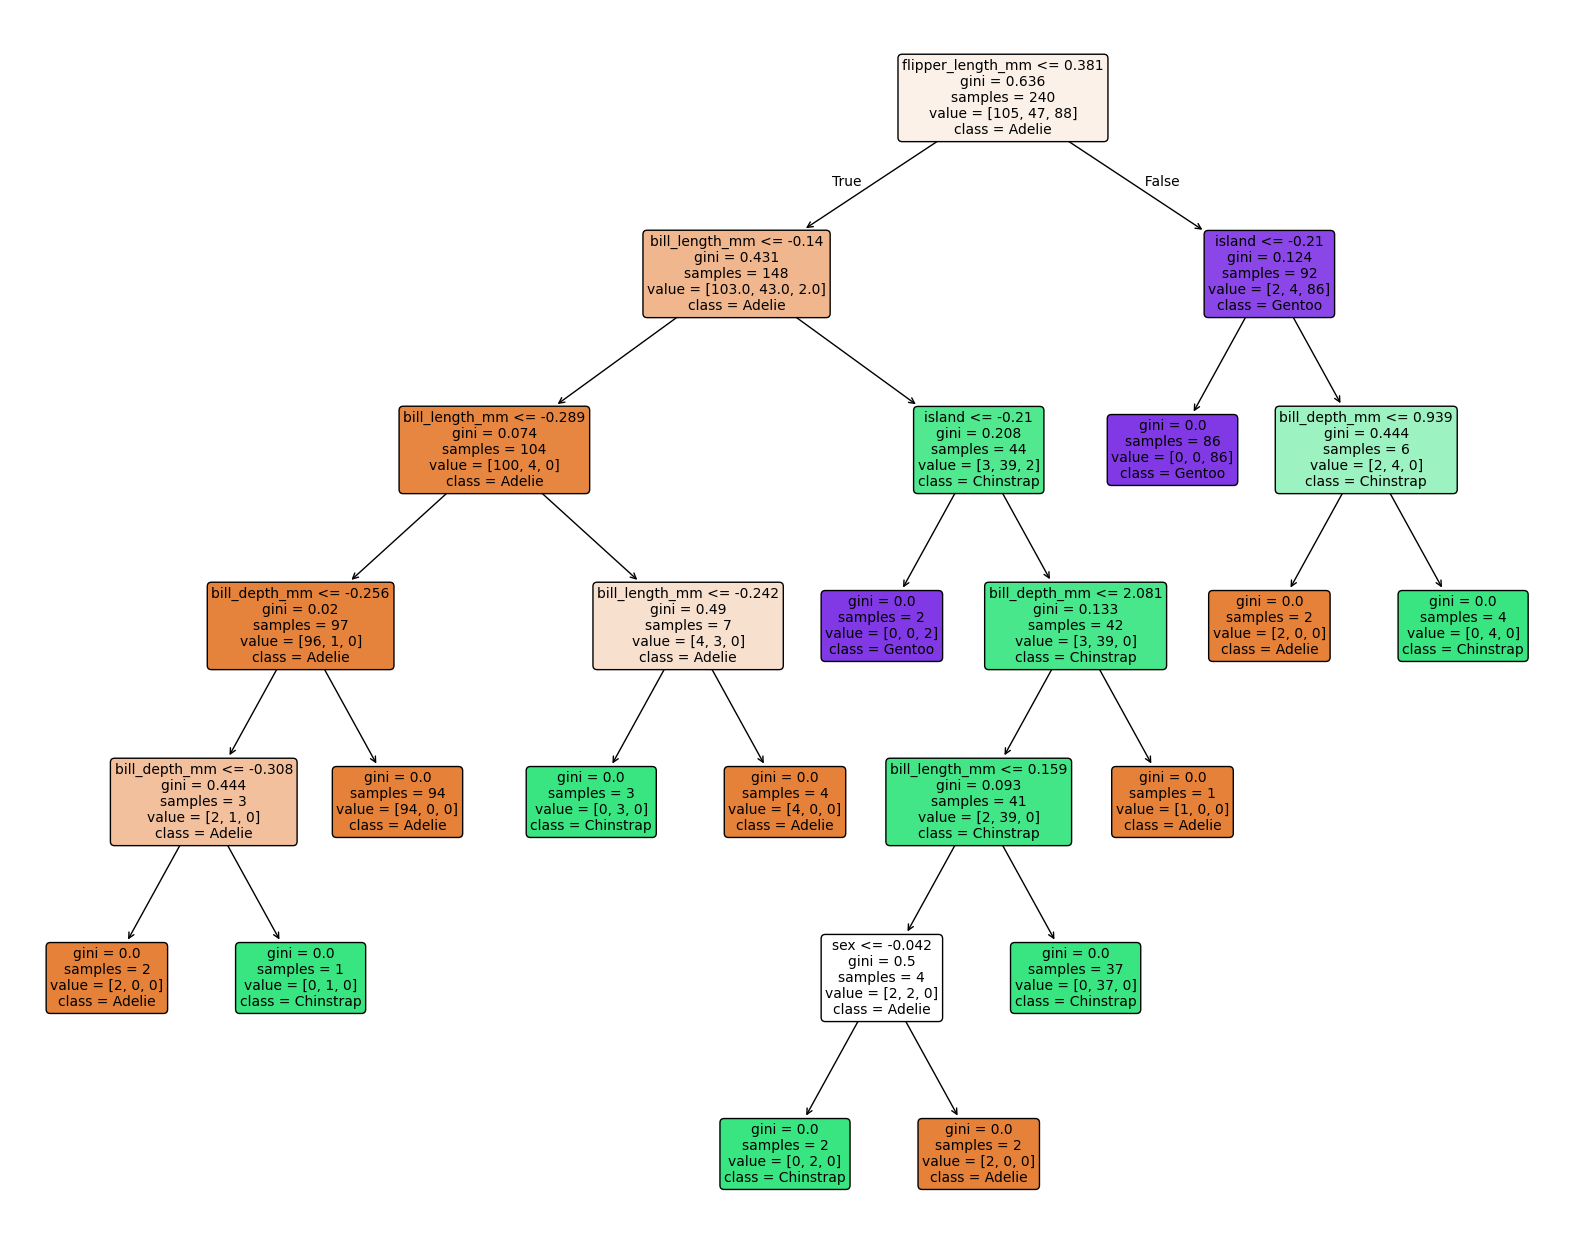

In [65]:
#Plot tree
plt.figure(figsize=(20,16))
plot_tree(  model, 
            feature_names=x.columns,  
            class_names=model.classes_, 
            filled=True, rounded=True,  
            fontsize=10)  


plt.show()

In [39]:

y_pred= model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'accracy: {accuracy}')

accracy: 0.9615384615384616


Text(77.92222222222227, 0.5, 'predicted label')

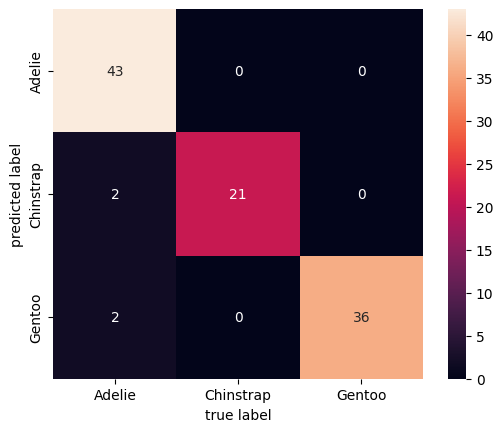

In [40]:
mat = confusion_matrix(y_pred, y_test)
classes = sorted(set(y_test))
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=True, xticklabels=classes, yticklabels=classes)
plt.xlabel("true label")
plt.ylabel("predicted label")

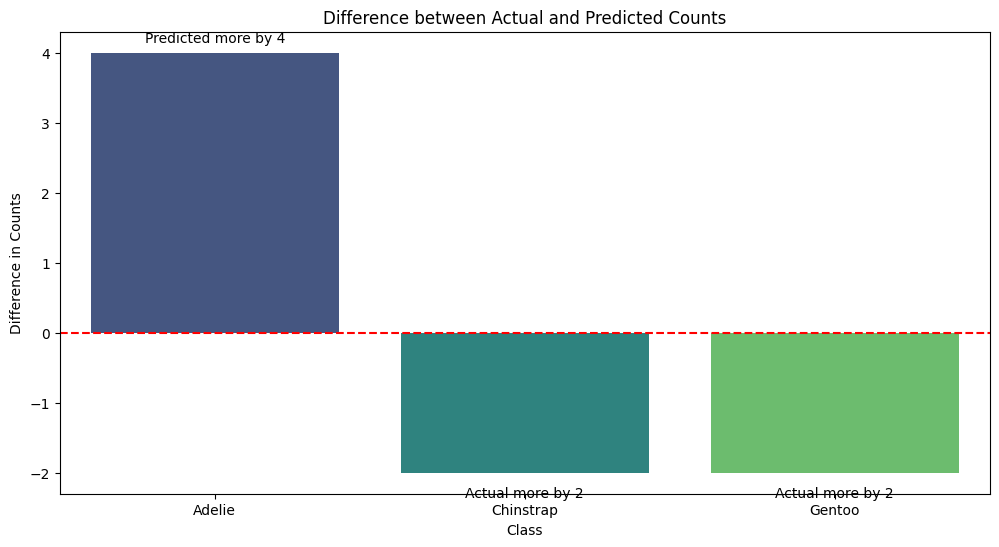

In [41]:
data = {
    'Actual': y_test,
    'Predicted': y_pred
}
df = pd.DataFrame(data)

# Calculate the difference between the real value and the predicted value
actual_counts = df['Actual'].value_counts().sort_index()
predicted_counts = df['Predicted'].value_counts().sort_index()
difference = actual_counts - predicted_counts

# Creating a DataFrame for the Difference
diff_df = pd.DataFrame({
    'Class': actual_counts.index,
    'Difference': difference
})

# Plot barplot show the difference
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Class', y='Difference', data=diff_df, palette='viridis')


plt.title('Difference between Actual and Predicted Counts')
plt.xlabel('Class')
plt.ylabel('Difference in Counts')
plt.xticks(ticks=np.arange(len(penguin['species'].unique())), labels=penguin['species'].unique())
plt.axhline(0, color='red', linestyle='--')  


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'Predicted more by {int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points', 
                    fontsize=10, color='black')
    else:
        ax.annotate(f'Actual more by {int(-height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='top', 
                    xytext=(0, -10), textcoords='offset points', 
                    fontsize=10, color='black')

plt.show()

## Max_Depth=1

In [42]:
model=DecisionTreeClassifier(max_depth= 1,random_state=23521665)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=23521665)

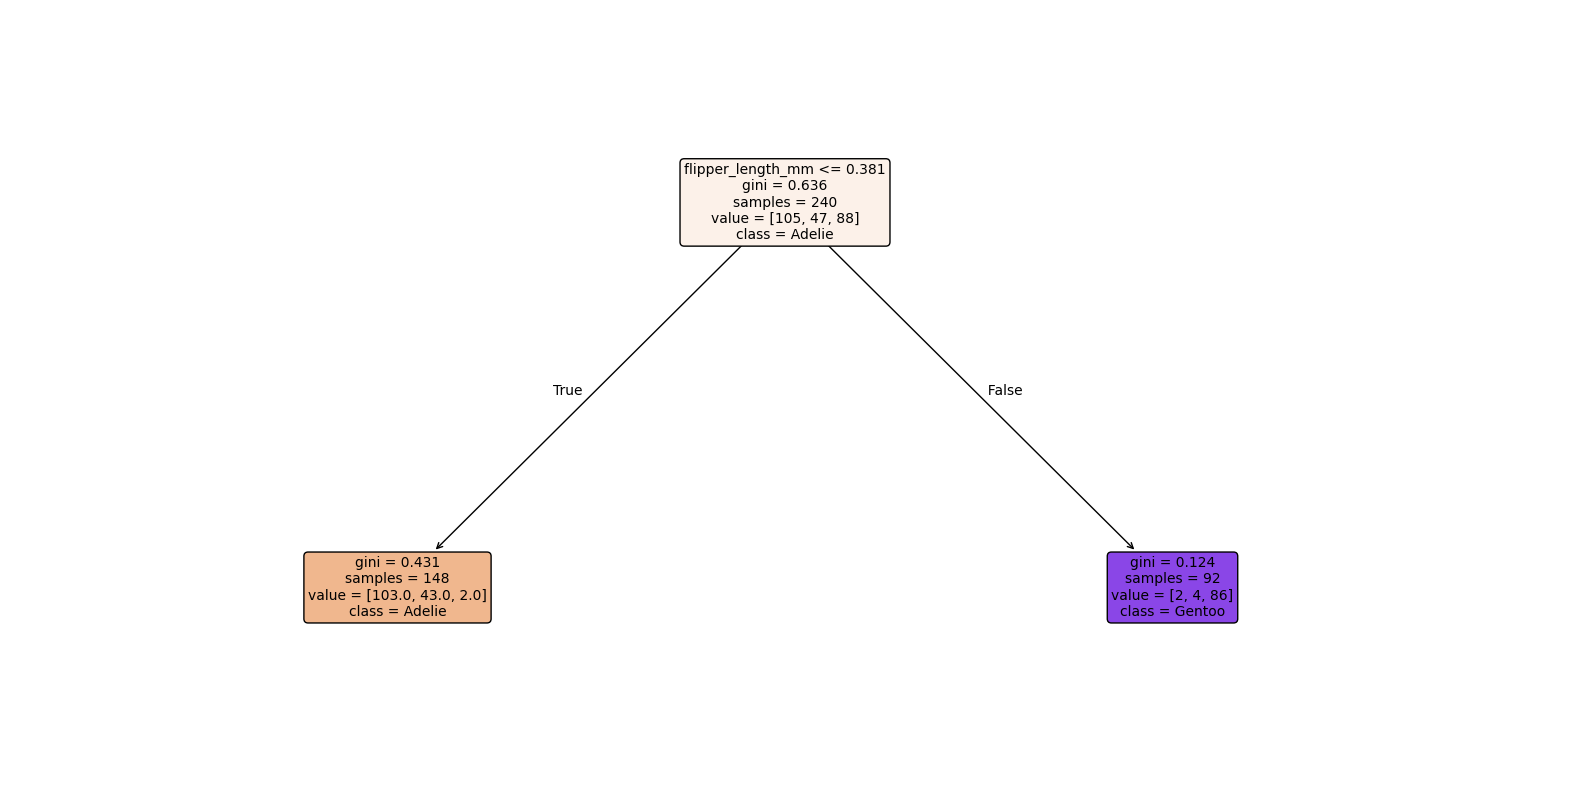

In [43]:
#Plot tree
plt.figure(figsize=(20,16))
plot_tree(  model, 
            feature_names=x.columns,  
            class_names=model.classes_, 
            filled=True, rounded=True,  
            fontsize=10)  


plt.show()

In [44]:
y_pred= model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'accracy: {accuracy}')

accracy: 0.7980769230769231


Text(77.92222222222227, 0.5, 'predicted label')

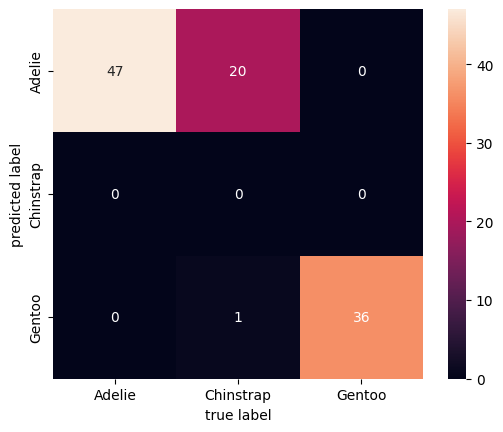

In [45]:
mat = confusion_matrix(y_pred, y_test)
classes = sorted(set(y_test))
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=True, xticklabels=classes, yticklabels=classes)

plt.xlabel("true label")
plt.ylabel("predicted label")

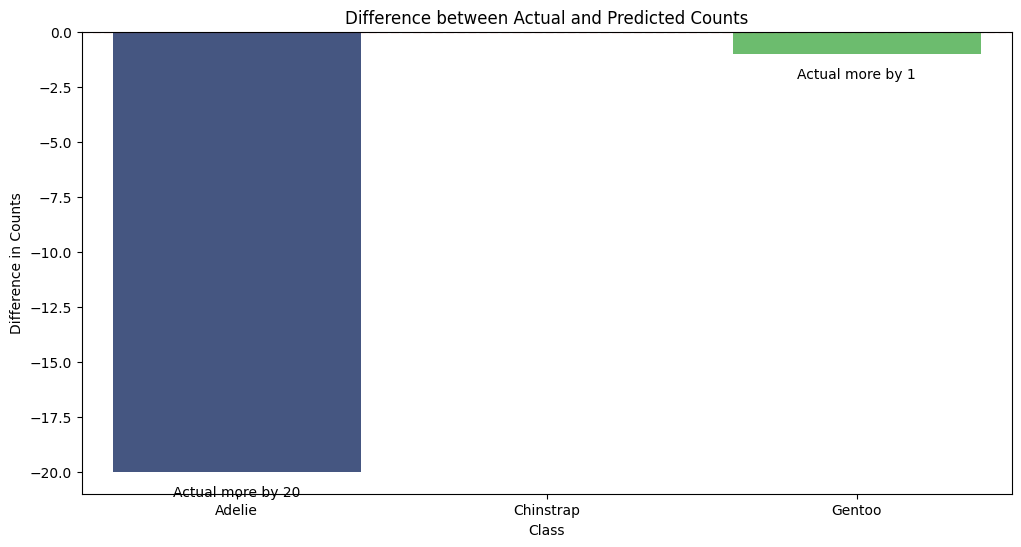

In [46]:
data = {
    'Actual': y_test,
    'Predicted': y_pred
}
df = pd.DataFrame(data)

# Calculate the difference between the real value and the predicted value
actual_counts = df['Actual'].value_counts().sort_index()
predicted_counts = df['Predicted'].value_counts().sort_index()
difference = actual_counts - predicted_counts

# Creating a DataFrame for the Difference
diff_df = pd.DataFrame({
    'Class': actual_counts.index,
    'Difference': difference
})

# Plot barplot show the difference
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Class', y='Difference', data=diff_df, palette='viridis')


plt.title('Difference between Actual and Predicted Counts')
plt.xlabel('Class')
plt.ylabel('Difference in Counts')
plt.xticks(ticks=np.arange(len(penguin['species'].unique())), labels=penguin['species'].unique())
plt.axhline(0, color='red', linestyle='--')  


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'Predicted more by {int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points', 
                    fontsize=10, color='black')
    else:
        ax.annotate(f'Actual more by {int(-height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='top', 
                    xytext=(0, -10), textcoords='offset points', 
                    fontsize=10, color='black')

plt.show()

## Max_Depth = 8

In [47]:
model=DecisionTreeClassifier(max_depth= 8,random_state=23521665)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=23521665)

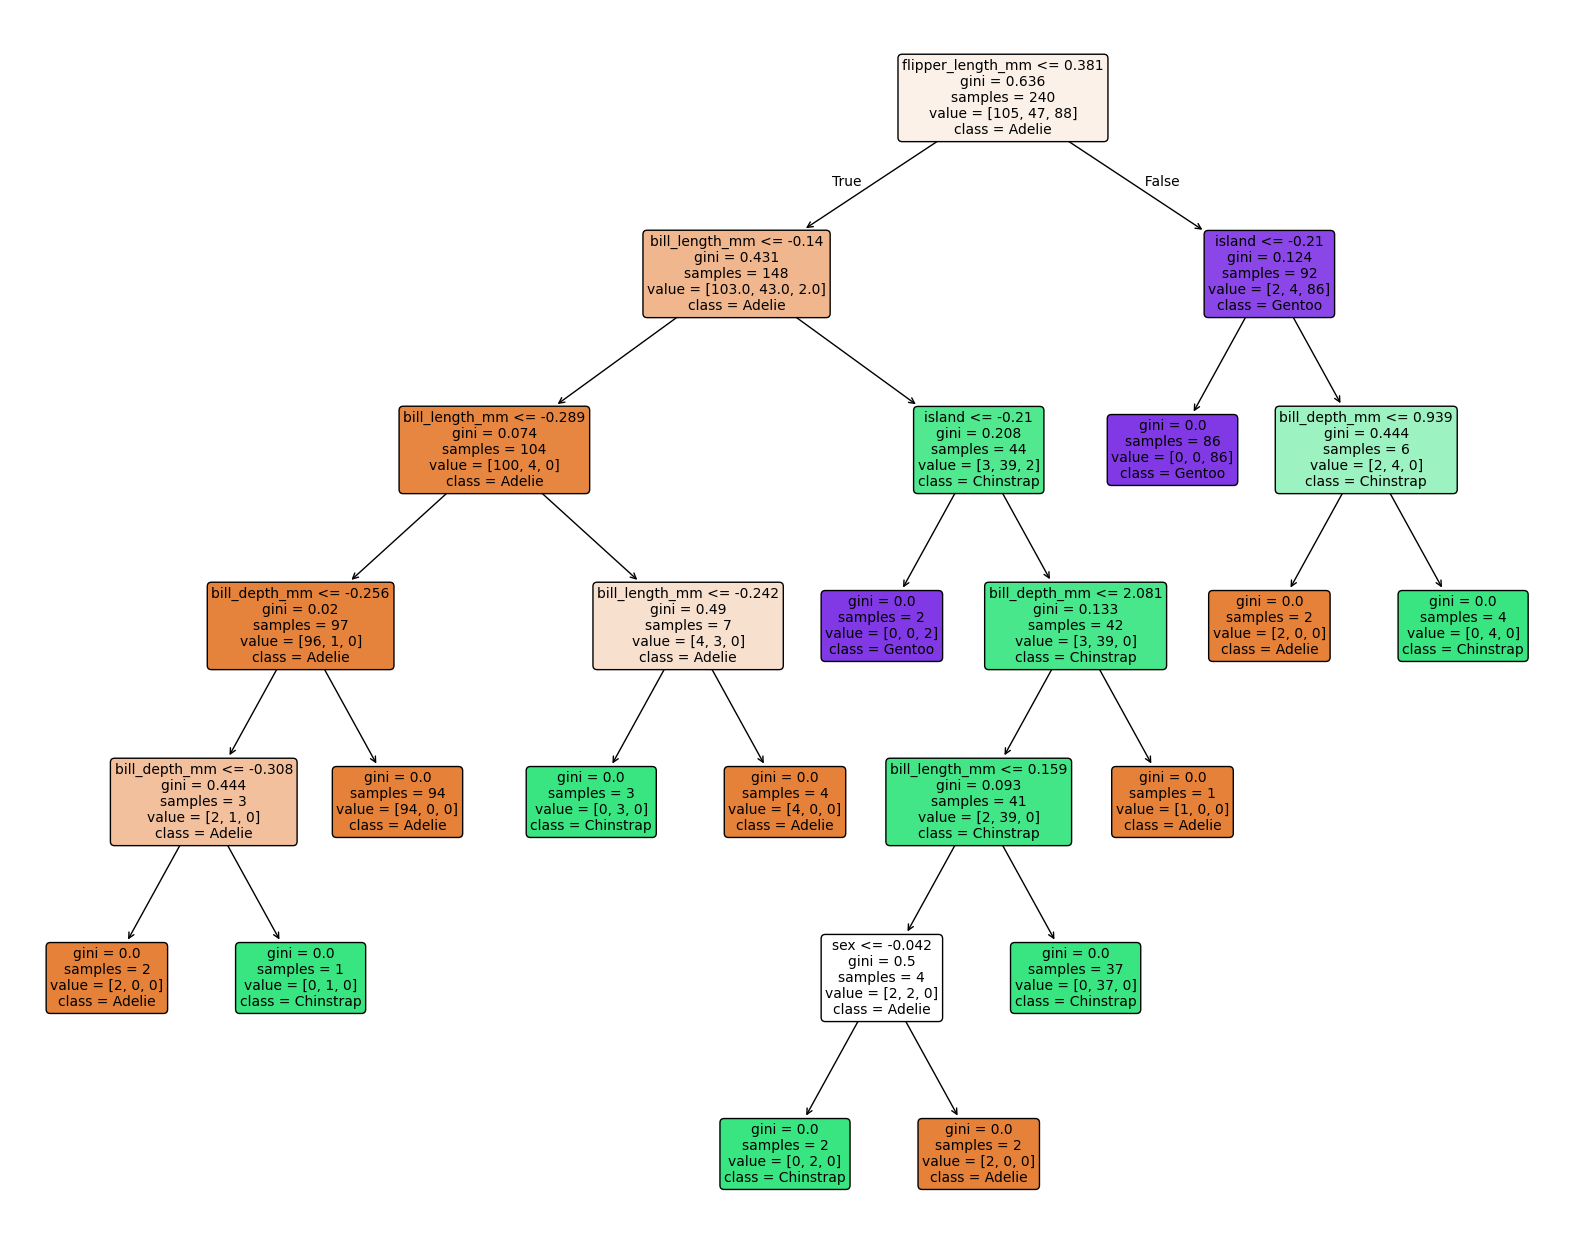

In [66]:
#Plot tree
plt.figure(figsize=(20,16))
plot_tree(  model, 
            feature_names=x.columns,  
            class_names=model.classes_, 
            filled=True, rounded=True,  
            fontsize=10)  


plt.show()

In [49]:
y_pred= model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'accracy: {accuracy}')

accracy: 0.9423076923076923


Text(77.92222222222227, 0.5, 'predicted label')

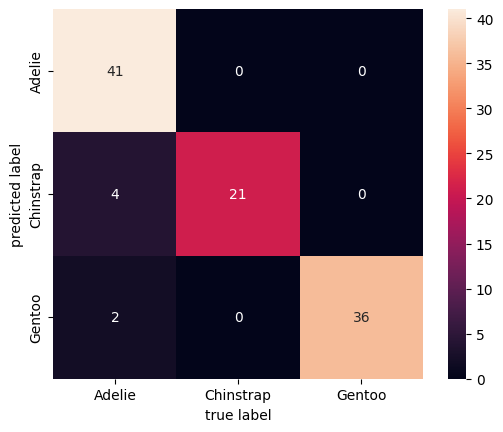

In [50]:
mat = confusion_matrix(y_pred, y_test)
classes = sorted(set(y_test))
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=True, xticklabels=classes, yticklabels=classes)

plt.xlabel("true label")
plt.ylabel("predicted label")

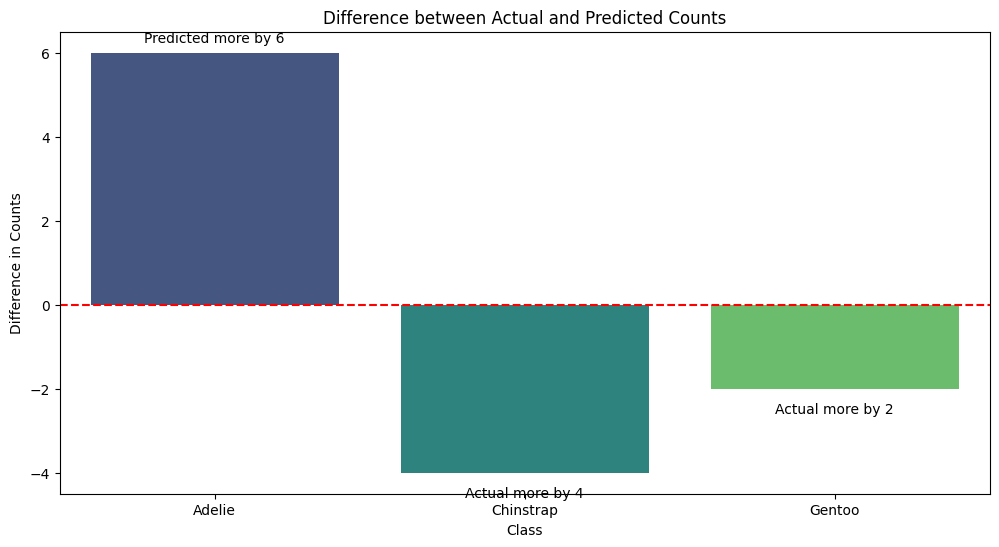

In [51]:
data = {
    'Actual': y_test,
    'Predicted': y_pred
}
df = pd.DataFrame(data)

# Calculate the difference between the real value and the predicted value
actual_counts = df['Actual'].value_counts().sort_index()
predicted_counts = df['Predicted'].value_counts().sort_index()
difference = actual_counts - predicted_counts

# Creating a DataFrame for the Difference
diff_df = pd.DataFrame({
    'Class': actual_counts.index,
    'Difference': difference
})

# Plot barplot show the difference
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Class', y='Difference', data=diff_df, palette='viridis')


plt.title('Difference between Actual and Predicted Counts')
plt.xlabel('Class')
plt.ylabel('Difference in Counts')
plt.xticks(ticks=np.arange(len(penguin['species'].unique())), labels=penguin['species'].unique())
plt.axhline(0, color='red', linestyle='--')  


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'Predicted more by {int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points', 
                    fontsize=10, color='black')
    else:
        ax.annotate(f'Actual more by {int(-height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='top', 
                    xytext=(0, -10), textcoords='offset points', 
                    fontsize=10, color='black')

plt.show()

# Conslusion on Max_Depth

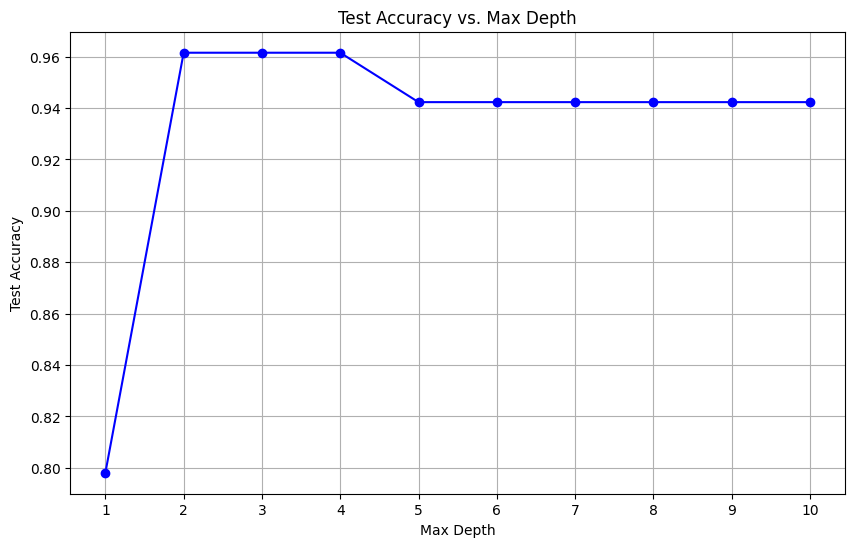

In [61]:
test_accuracies = []


for max_depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=23521665)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [64]:
max_depth_values = [1, 4, 8]


accuracy_results = {}


for max_depth in max_depth_values:
   
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=23521665)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_results[max_depth] = accuracy

for max_depth, accuracy in accuracy_results.items():
    print(f"max_depth: {max_depth}\t Accuracy: {accuracy}")

max_depth: 1	 Accuracy: 0.7980769230769231
max_depth: 4	 Accuracy: 0.9615384615384616
max_depth: 8	 Accuracy: 0.9423076923076923


* Max_Depth quyết định độ sâu của cây tức là độ sâu từ node gốc đến node lá, max_depth càng lớn thì cây sẽ được phân tầng nhiều hơn. Nếu đặt quá lớn thì cây sẽ dừng lại ở mức hội tụ tức là khi gini=0


*ẢNH HƯỞNG CỦA MAX_DEPTH*
+ Nếu quá nhỏ thì cây sẽ đơn giản, cây không học được tất cả các mẫu phức tạp trong dữ liệu dẫn đến UNDERFITTING, giảm độ chính xác trong tập kiểm thử
+ Nếu quá lớn thì cây sẽ rất phức tạp, cây sẽ học hết tất cả dữ liệu bao gồm cả nhiễu và lỗi dẫn đến OVERFITTING, giảm độ chính xác trong tập kiểm thử
+ Nếu đặt maxdepth ở mức phù hợp mô hình sẽ hoạt động tốt dẫn đến kết quả tốt trong tập kiểm thử